In [66]:
import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import numpy as np

In [67]:
data = pd.read_csv('../data/basic_data.csv')

In [68]:
data['log_closePrice'] = np.log(data['closePrice'])

In [93]:
data

date  stock  closePrice  log_closePrice
0         0      0       60.17        4.097174
1         1      0       59.99        4.094178
2         2      0       59.66        4.088662
3         3      0       59.38        4.083957
4         4      0       59.21        4.081090
...     ...    ...         ...             ...
24995   495     49       43.77        3.778949
24996   496     49       43.93        3.782597
24997   497     49       44.41        3.793465
24998   498     49       44.30        3.790985
24999   499     49       44.60        3.797734

[25000 rows x 4 columns]

In [69]:
colint_stock_list = []

for stock_i in range(50):

    stock_i_df = data[data['stock'] == stock_i]

    for stock_j in range(stock_i+1, 50):
        
        stock_j_df = data[data['stock'] == stock_j]

        outcome = coint(stock_i_df['log_closePrice'], stock_j_df['log_closePrice'])

        if outcome[1] < 0.05:
            colint_stock_list.append(([stock_i, stock_j], outcome))
            print(stock_i, stock_j)


3 18
9 18
10 34
10 37
12 18
13 43
18 19
18 20
18 29
18 30
18 34
18 37
18 42
18 44
18 48
20 29
20 34
20 42
22 39
33 39
35 41


In [ ]:
for ([stock_i, stock_j], outcome) in colint_stock_list:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    print(stock_i, stock_j)

    plt.plot(stock_i_df['date'], stock_i_df['closePrice'], label=stock_i)
    plt.plot(stock_j_df['date'], stock_j_df['closePrice'], label=stock_j)
    plt.show()


In [72]:
colint_stock_list_ct = []

for stock_i in range(50):

    stock_i_df = data[data['stock'] == stock_i]

    for stock_j in range(stock_i+1, 50):
        
        stock_j_df = data[data['stock'] == stock_j]

        outcome = coint(stock_i_df['log_closePrice'], stock_j_df['log_closePrice'], trend = 'ct')

        if outcome[1] < 0.05:
            colint_stock_list_ct.append(([stock_i, stock_j], outcome))
            print(stock_i, stock_j)


0 12
0 46
4 35
10 33
12 27
13 34
16 39
18 23
18 30
18 34
18 42
18 48
18 49
19 37
20 23
22 25
25 35
25 39
31 38
33 39
34 36
34 48
35 39
39 41


In [73]:
len(colint_stock_list_ct)

24

0 12


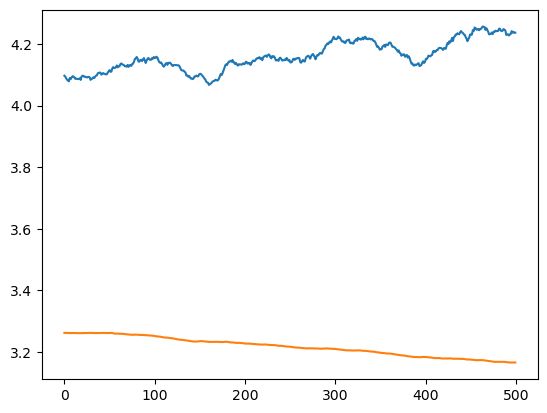

0 46


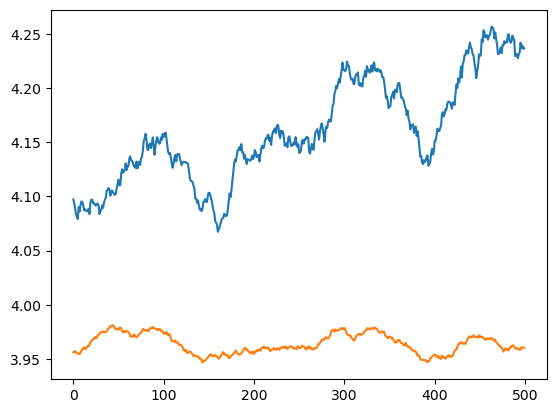

4 35


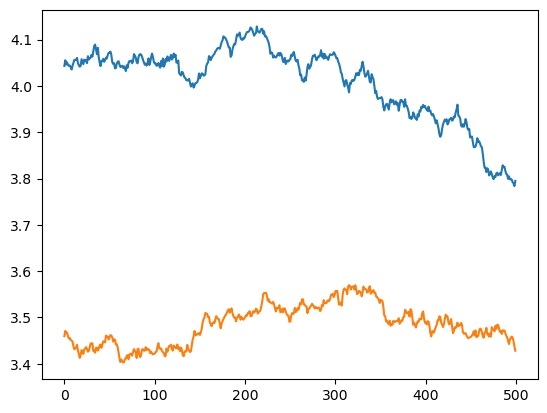

10 33


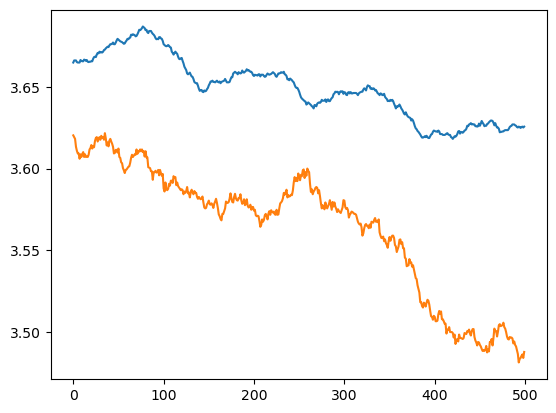

12 27


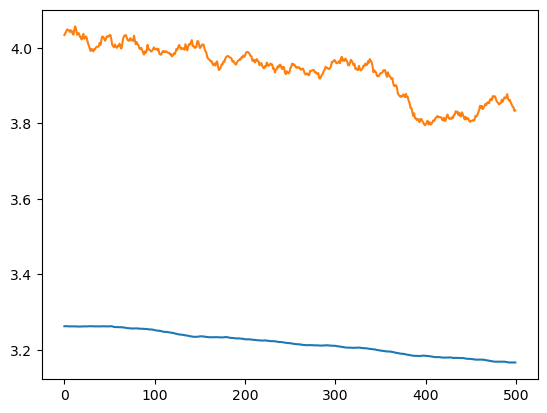

13 34


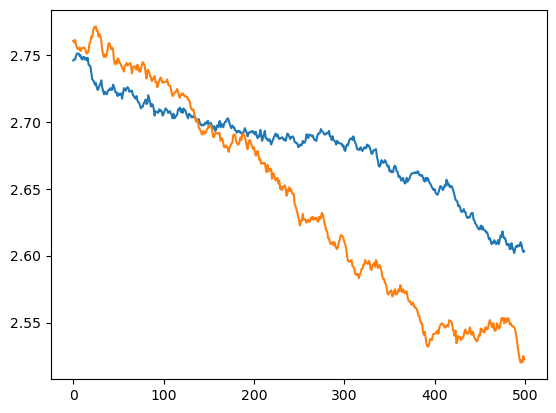

16 39


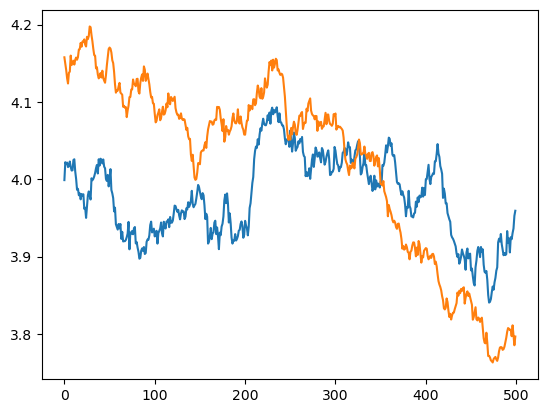

18 23


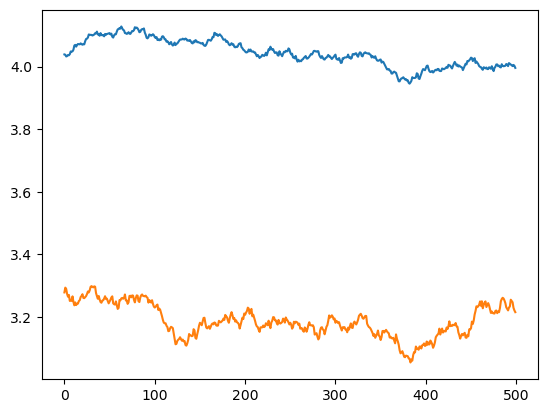

18 30


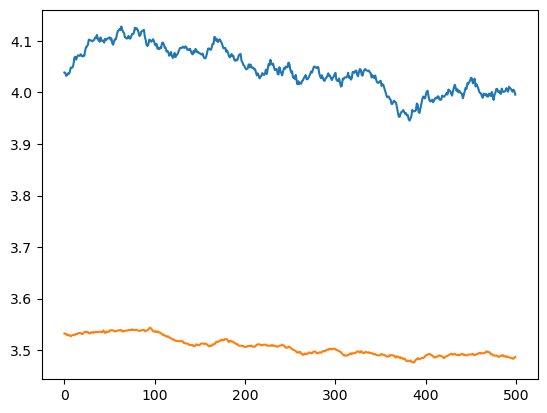

18 34


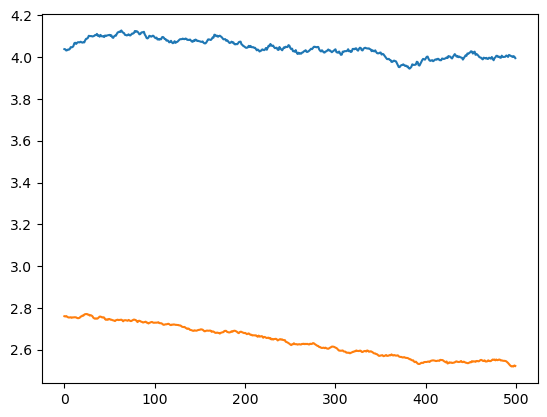

18 42


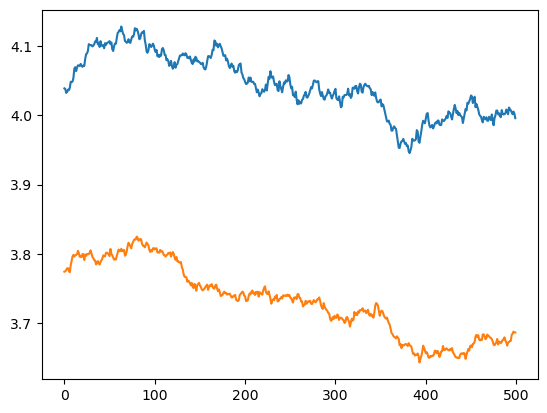

18 48


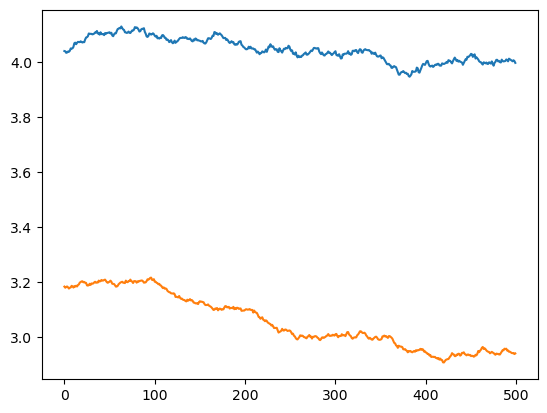

18 49


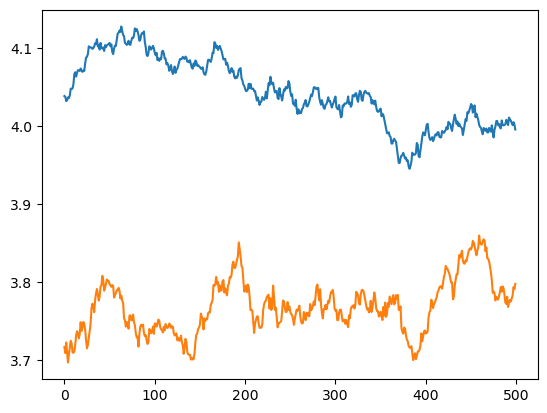

19 37


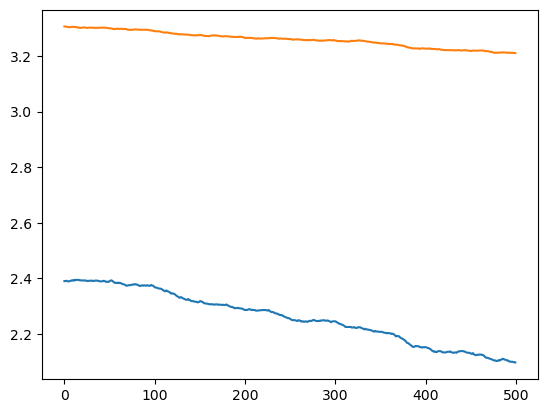

20 23


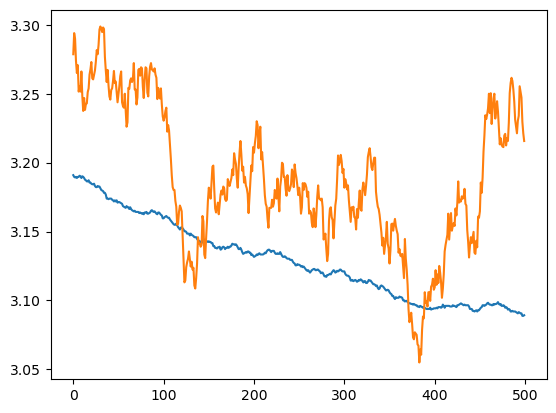

22 25


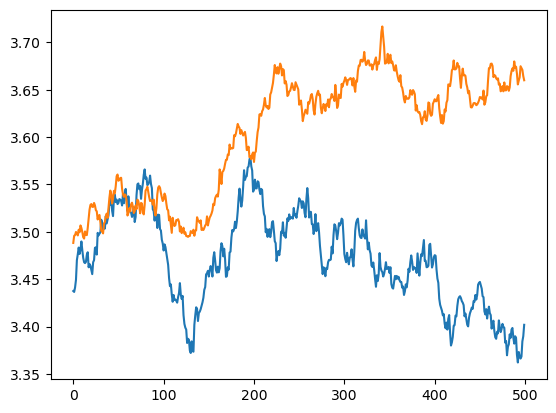

25 35


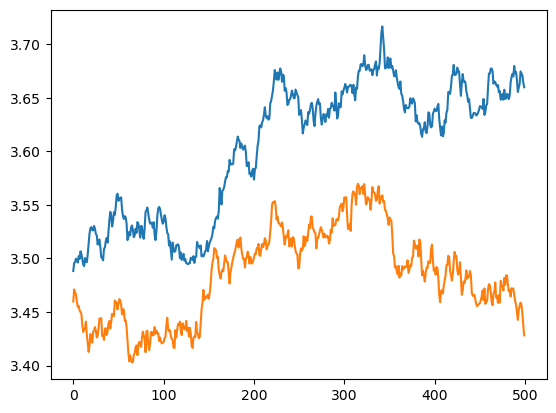

25 39


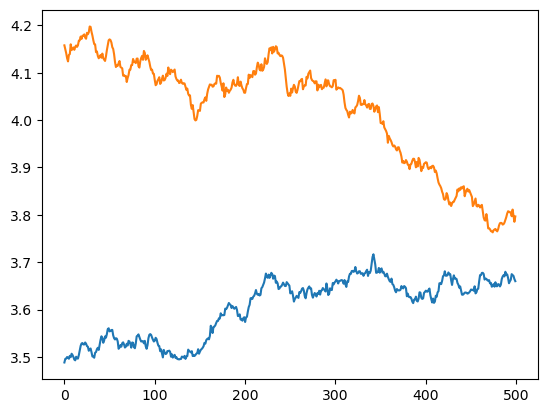

31 38


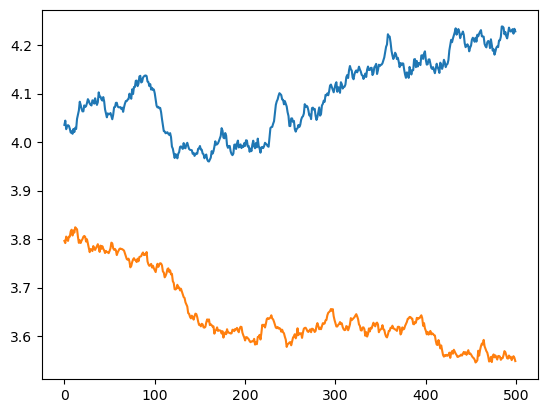

33 39


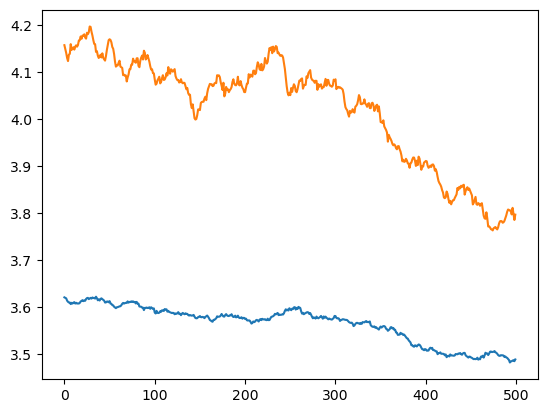

34 36


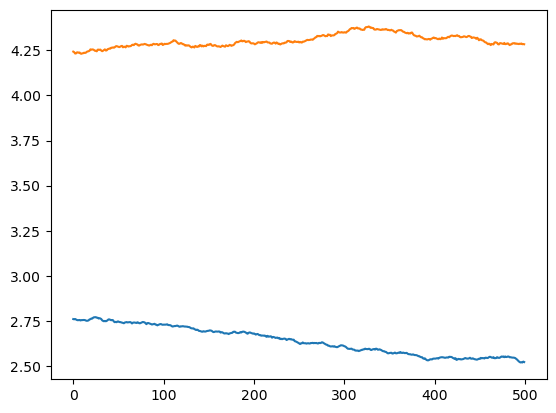

34 48


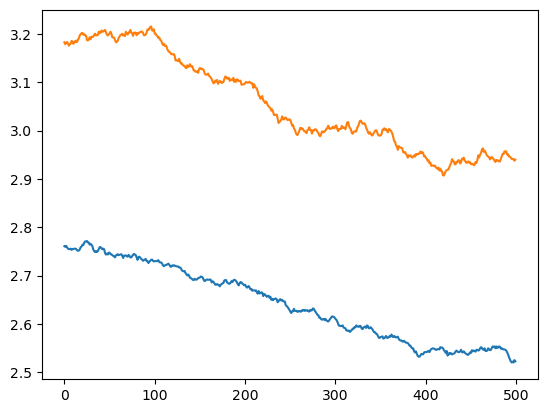

35 39


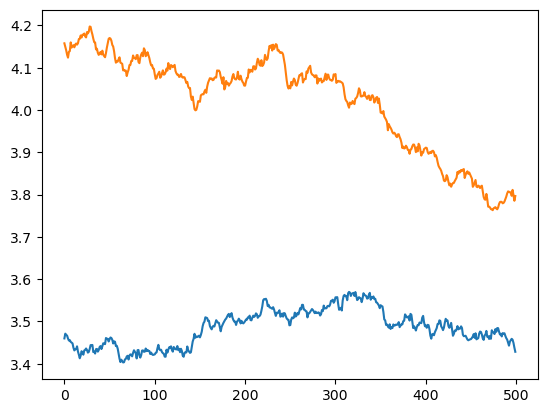

39 41


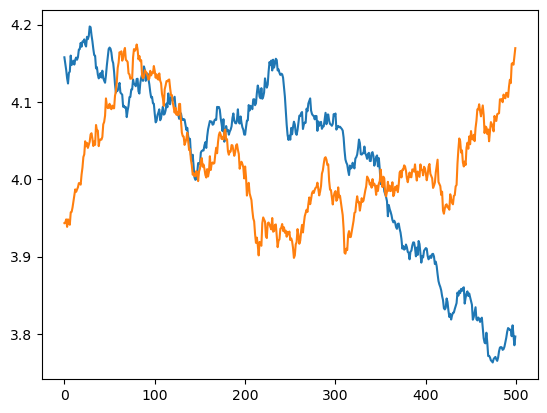

In [101]:
for ([stock_i, stock_j], outcome) in colint_stock_list_ct:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    print(stock_i, stock_j)

    plt.plot(stock_i_df['date'], stock_i_df['log_closePrice'], label=stock_i)
    plt.plot(stock_j_df['date'], stock_j_df['log_closePrice'], label=stock_j)
    plt.show()


`close price trend`

In [138]:
from sklearn.linear_model import LinearRegression

coint_trend_diff_price = pd.DataFrame(columns=['Pair', 'Slope', 'intercept'])

for ([stock_i, stock_j], outcome) in colint_stock_list_ct:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    # Price difference df
    diff = pd.DataFrame()
    diff['difference'] = (stock_i_df['closePrice'].reset_index() - stock_j_df['closePrice'].reset_index())['closePrice']
    diff = np.array(diff['difference']).reshape(-1, 1)
    date = np.array(stock_i_df['date']).reshape(-1, 1)

    
    # Fit linear regression
    LR = LinearRegression(n_jobs=-1).fit(date, diff)

    # Append new data
    new_data = {
        'Pair': [(stock_i, stock_j)],
        'Slope': [LR.coef_],
        'intercept': [LR.intercept_]
    }
    new_df = pd.DataFrame(new_data)
    coint_trend_diff_price = coint_trend_diff_price.append(new_df, ignore_index=True)


coint_trend_diff_price

/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/2919430343.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coint_trend_diff_price = coint_trend_diff_price.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/2919430343.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coint_trend_diff_price = coint_trend_diff_price.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/2919430343.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coint_trend_diff_price = coint_trend_diff_price.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/2919430343.py:26: FutureWarning: Th

Pair                        Slope              intercept
0    (0, 12)     [[0.023272050688202758]]    [33.37004335329341]
1    (0, 46)     [[0.018588372913491656]]    [6.844880958083832]
2    (4, 35)    [[-0.026984673058692243]]   [29.359235928143715]
3   (10, 33)    [[0.0041077292309169245]]    [2.090541556886227]
4   (12, 27)     [[0.017232271489085963]]   [-30.78117173652695]
5   (13, 34)     [[0.004068886515546063]]  [-0.4698071856287427]
6   (16, 39)     [[0.036238472153888625]]  [-11.804798802395212]
7   (18, 23)    [[-0.010590225720902888]]   [35.461021317365265]
8   (18, 30)    [[-0.010848580514322062]]    [26.44282083832335]
9   (18, 34)     [[-0.00730422137688551]]   [44.843583233532925]
10  (18, 42)    [[-0.000815940863763454]]    [15.47885724550898]
11  (18, 48)   [[-0.0006782959931839728]]   [35.921694850299396]
12  (18, 49)    [[-0.019233590534362143]]   [18.562740838323354]
13  (19, 37)   [[-0.0011081569126276504]]  [-16.155054850299404]
14  (20, 23)  [[-0.00034431641726566966]]  [-1.3237130538922153]
15  (22, 25)    [[-0.019368791715166863]]  [0.25015353293413245]
16  (25, 35)      [[0.00925598454393818]]   [1.8715518562874247]
17  (25, 39)     [[0.051959699998800006]]    [-32.3593051497006]
18  (31, 38)      [[0.04237861351445407]]   [11.191955928143711]
19  (33, 39)     [[0.029737190308761246]]   [-28.29550898203593]
20  (34, 36)    [[-0.018340944883779534]]   [-55.31771425149701]
21  (34, 48)     [[0.006625925383701538]]   [-8.921888383233533]
22  (35, 39)      [[0.04270371545486182]]   [-34.23085700598803]
23  (39, 41)    [[-0.032566352825411315]]    [8.271205029940122]

`Log closed price trend`

In [139]:
coint_trend_diff_log_price = pd.DataFrame(columns=['Pair', 'Slope', 'intercept'])

for ([stock_i, stock_j], outcome) in colint_stock_list_ct:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    # Price difference df
    diff = pd.DataFrame()
    diff['difference'] = (stock_i_df['log_closePrice'].reset_index() - stock_j_df['log_closePrice'].reset_index())['log_closePrice']
    diff = np.array(diff['difference']).reshape(-1, 1)
    date = np.array(stock_i_df['date']).reshape(-1, 1)
    
    # Fit linear regression
    LR = LinearRegression(n_jobs=-1).fit(date, diff)

    # Append new data
    new_data = {
        'Pair': [(stock_i, stock_j)],
        'Slope': [LR.coef_],
        'intercept': [LR.intercept_]
    }
    new_df = pd.DataFrame(new_data)
    coint_trend_diff_log_price = coint_trend_diff_log_price.append(new_df, ignore_index=True)


coint_trend_diff_log_price

/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3301956970.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coint_trend_diff_log_price = coint_trend_diff_log_price.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3301956970.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coint_trend_diff_log_price = coint_trend_diff_log_price.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3301956970.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coint_trend_diff_log_price = coint_trend_diff_log_price.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3301956970.

Pair                        Slope               intercept
0    (0, 12)    [[0.0004892030720560891]]    [0.8206078343568612]
1    (0, 46)    [[0.0002901272889729927]]   [0.12370318111558491]
2    (4, 35)   [[-0.0005619126883113912]]    [0.6646382687416885]
3   (10, 33)   [[0.00012957176187137803]]  [0.052761520002988165]
4   (12, 27)   [[0.00023318444485942067]]   [-0.7790628290548194]
5   (13, 34)    [[0.0002961599570216913]]  [-0.03347510031776603]
6   (16, 39)    [[0.0006671362371533991]]  [-0.21181964199728887]
7   (18, 23)   [[-8.811197784620296e-05]]    [0.8777015368481185]
8   (18, 30)   [[-0.0001414601793137141]]    [0.5719787276070515]
9   (18, 34)   [[0.00027120174095411745]]    [1.3350651204315243]
10  (18, 42)     [[7.49780138474708e-05]]    [0.2930316455689824]
11  (18, 48)    [[0.0003972835994027591]]    [0.8889367740718187]
12  (18, 49)   [[-0.0003607731412597305]]    [0.3655304886591543]
13  (19, 37)   [[-0.0004459657516844855]]   [-0.8890049095325891]
14  (20, 23)  [[-2.6536678223886247e-05]]  [-0.05231444424437568]
15  (22, 25)   [[-0.0005559734322532871]]  [0.006582521146719839]
16  (25, 35)   [[0.00024058770260862523]]   [0.05942985577063738]
17  (25, 39)    [[0.0010842555337651843]]   [-0.6892005345817755]
18  (31, 38)    [[0.0008535433663476493]]   [0.23526632767763908]
19  (33, 39)    [[0.0004622377352702236]]    [-0.573837818317097]
20  (34, 36)   [[-0.0006774556864935497]]   [-1.4929727060533897]
21  (34, 48)   [[0.00012608185844864176]]   [-0.4461283463597055]
22  (35, 39)     [[0.000843667831156559]]    [-0.748630390352413]
23  (39, 41)   [[-0.0006117514698425837]]   [0.15096279547512376]

`Moving average trend`

In [94]:
WINDOW = 5

moving_avg = pd.DataFrame(columns=['stock', 'mid_date', 'avg_price'])

for stock in range(50):
    single_stock = data[data['stock'] == stock]

    for date in range(500-WINDOW):
        window = single_stock[(single_stock['date'] >= date) & (single_stock['date'] < date+WINDOW)]
        avg_price = window['closePrice'].mean()

        new_row = {'stock': stock, 'mid_date': date+(WINDOW-1)/2, 'avg_price': avg_price}
        moving_avg = moving_avg.append(new_row, ignore_index=True)


/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3226362795.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  moving_avg = moving_avg.append(new_row, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3226362795.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  moving_avg = moving_avg.append(new_row, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3226362795.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  moving_avg = moving_avg.append(new_row, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3226362795.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

stock  mid_date  avg_price
0        0.0       2.0     59.682
1        0.0       3.0     59.466
2        0.0       4.0     59.418
3        0.0       5.0     59.388
4        0.0       6.0     59.478
...      ...       ...        ...
24745   49.0     492.0     43.596
24746   49.0     493.0     43.576
24747   49.0     494.0     43.702
24748   49.0     495.0     43.880
24749   49.0     496.0     44.002

[24750 rows x 3 columns]

In [136]:
trend_moving_avg = pd.DataFrame(columns=['Pair', 'Slope', 'intercept'])

for ([stock_i, stock_j], outcome) in colint_stock_list_ct:
    stock_i_df = moving_avg[moving_avg['stock'] == stock_i]
    stock_j_df = moving_avg[moving_avg['stock'] == stock_j]

    # Price difference df
    diff = pd.DataFrame()
    diff['difference'] = (stock_i_df['avg_price'].reset_index() - stock_j_df['avg_price'].reset_index())['avg_price']
    diff = np.array(diff['difference']).reshape(-1, 1)
    date = np.array(stock_i_df['mid_date']).reshape(-1, 1)
    
    # Fit linear regression
    LR = LinearRegression(n_jobs=-1).fit(date, diff)

    # Append new data
    new_data = {
        'Pair': [(stock_i, stock_j)],
        'Slope': [LR.coef_],
        'intercept': [LR.intercept_]
    }
    new_df = pd.DataFrame(new_data)
    trend_moving_avg = trend_moving_avg.append(new_df, ignore_index=True)


trend_moving_avg

/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/303811197.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trend_moving_avg = trend_moving_avg.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/303811197.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trend_moving_avg = trend_moving_avg.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/303811197.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trend_moving_avg = trend_moving_avg.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/303811197.py:23: FutureWarning: The frame.append method is deprecated and 

Pair                        Slope               intercept
0    (0, 12)     [[0.023250969799866236]]     [33.37009235821714]
1    (0, 46)     [[0.018578305254451272]]    [6.8399898704295135]
2    (4, 35)     [[-0.02697226700859978]]    [29.389747010393865]
3   (10, 33)     [[0.004037124081351587]]     [2.104849033036385]
4   (12, 27)      [[0.01727522726283338]]   [-30.789503305617224]
5   (13, 34)     [[0.004117447097328253]]  [-0.47997159996200756]
6   (16, 39)      [[0.03634255879943486]]   [-11.851668858230997]
7   (18, 23)      [[-0.0108071835634654]]     [35.54184931336349]
8   (18, 30)    [[-0.011116141300691388]]    [26.519587870740846]
9   (18, 34)    [[-0.007573276186179414]]     [44.92082051783343]
10  (18, 42)   [[-0.0009122241086587423]]     [15.51475996467219]
11  (18, 48)   [[-0.0008546067967120604]]     [35.97826375904796]
12  (18, 49)    [[-0.019476319153398956]]    [18.627154984347857]
13  (19, 37)   [[-0.0011223881099093312]]    [-16.15113546164268]
14  (20, 23)  [[-0.00026972170444156823]]   [-1.3273241440788979]
15  (22, 25)      [[-0.0194591239547097]]   [0.28113196573281574]
16  (25, 35)     [[0.009103772939002143]]    [1.9048777099056386]
17  (25, 39)     [[0.051968779805367245]]    [-32.37544637355664]
18  (31, 38)      [[0.04231051266221046]]    [11.196949013776262]
19  (33, 39)     [[0.029722534341719415]]   [-28.310567616744702]
20  (34, 36)     [[-0.01857166724051275]]    [-55.29369930155677]
21  (34, 48)     [[0.006718669389467356]]    [-8.942556758785452]
22  (35, 39)      [[0.04286500686636511]]    [-34.28032408346229]
23  (39, 41)     [[-0.03153909316489962]]     [8.071044299070106]

0 12


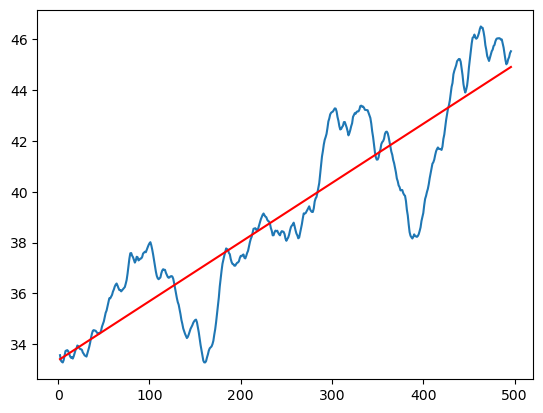

0 46


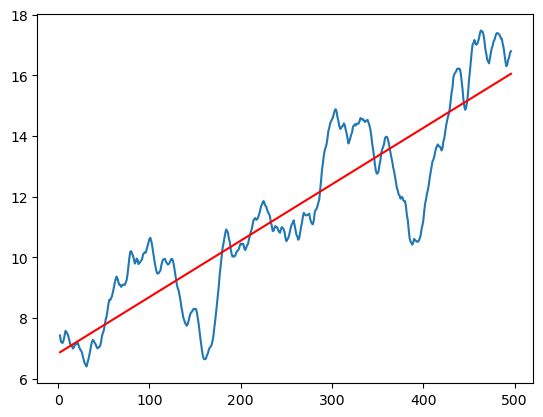

4 35


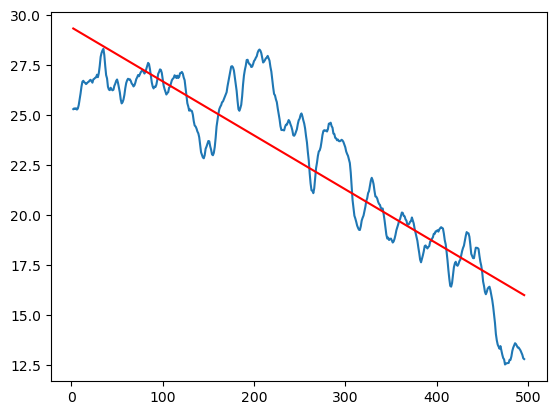

10 33


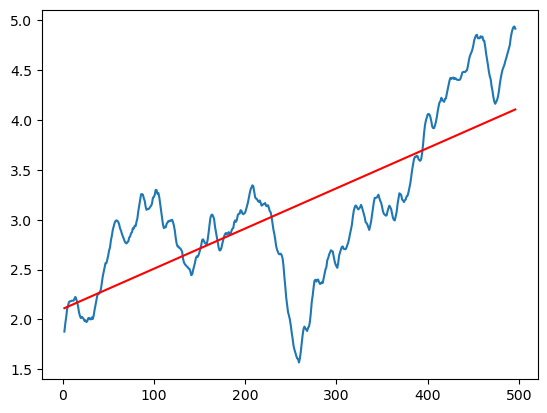

12 27


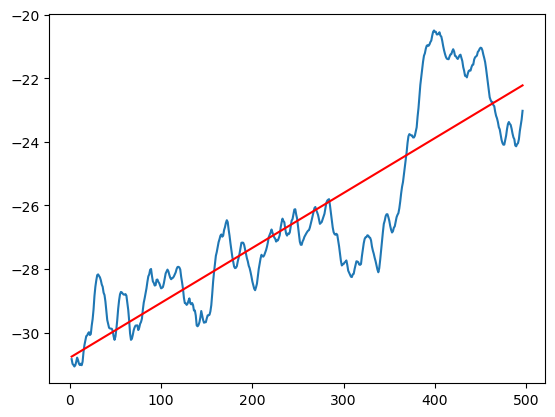

13 34


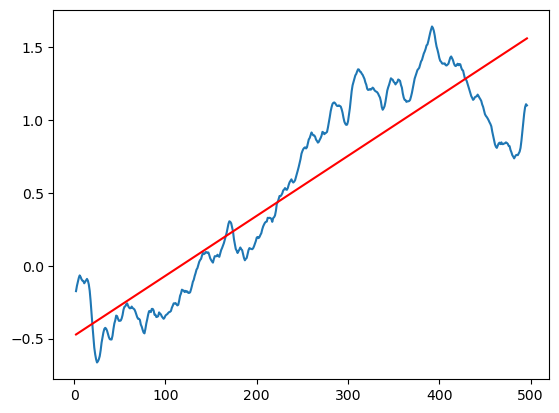

16 39


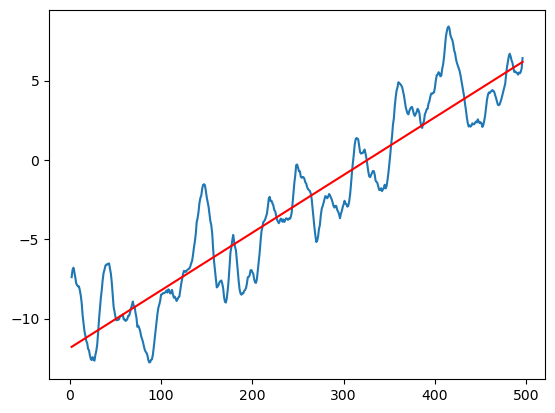

18 23


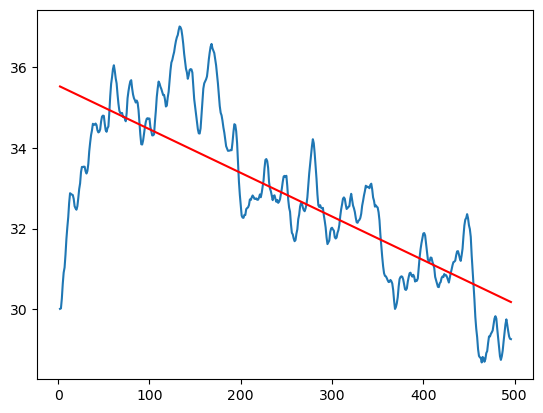

18 30


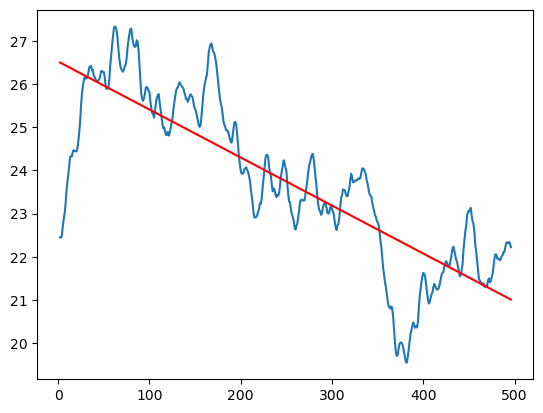

18 34


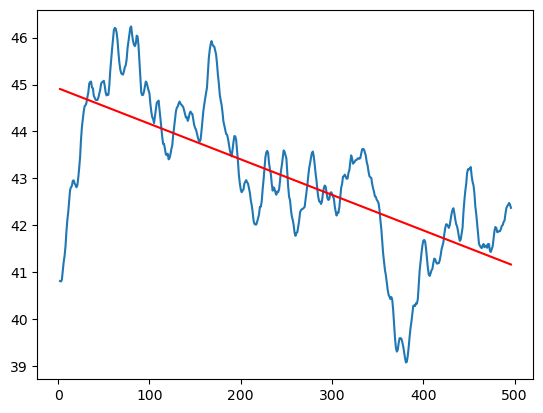

18 42


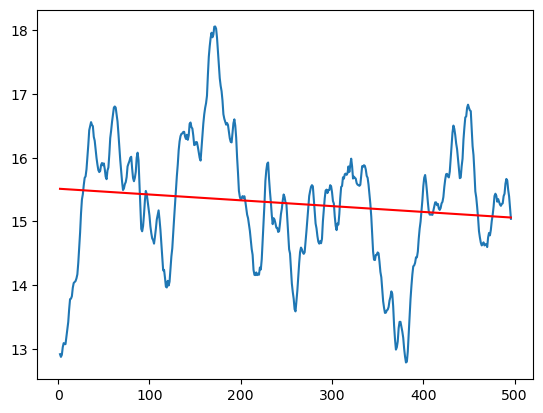

18 48


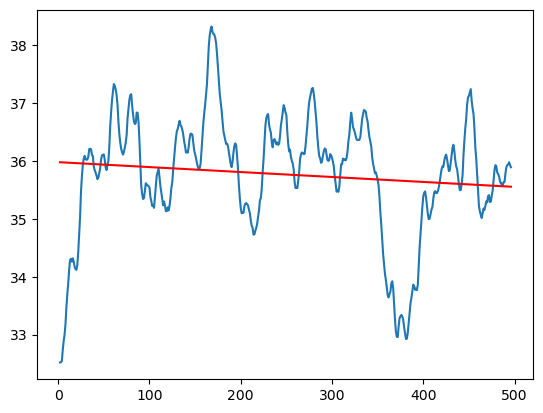

18 49


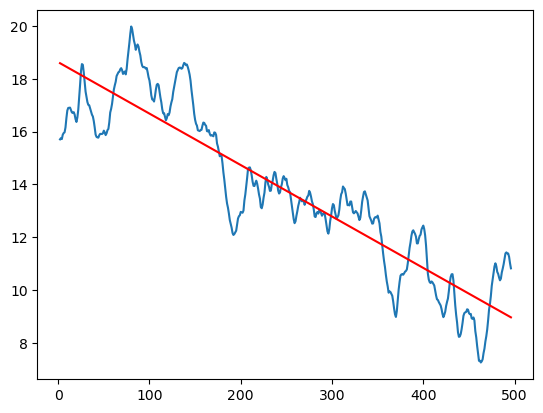

19 37


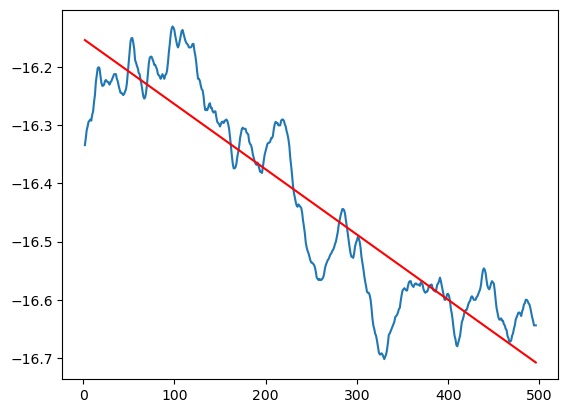

20 23


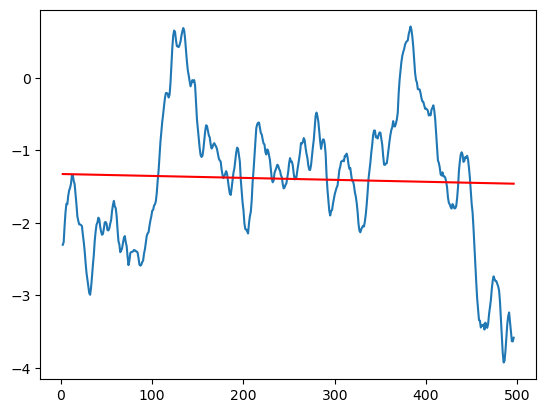

22 25


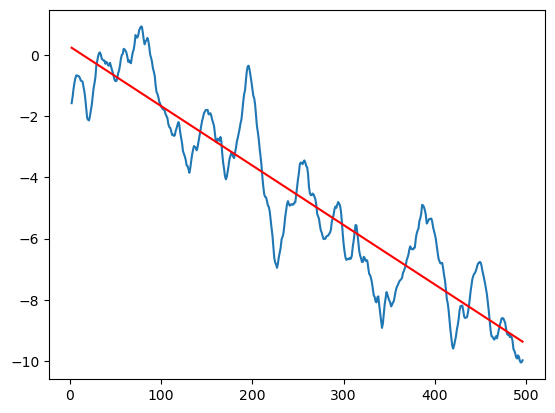

25 35


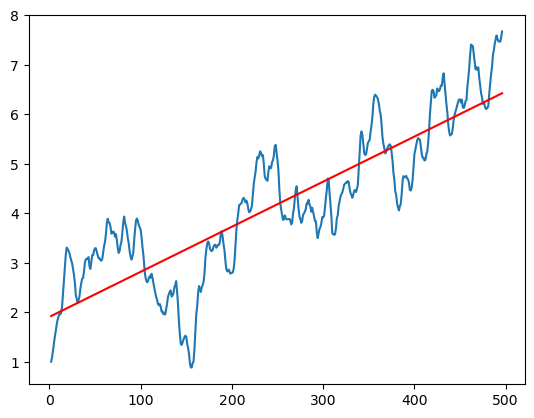

25 39


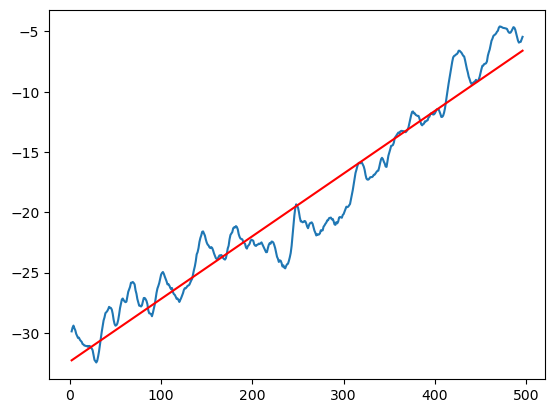

31 38


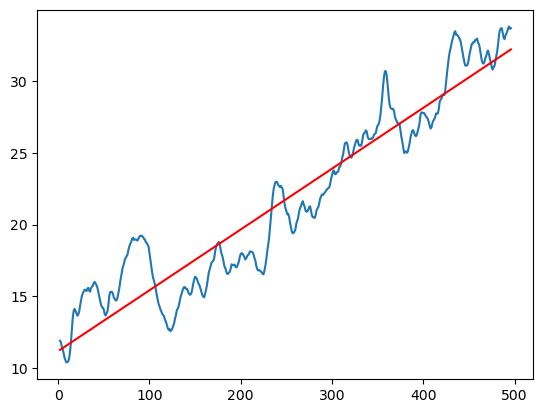

33 39


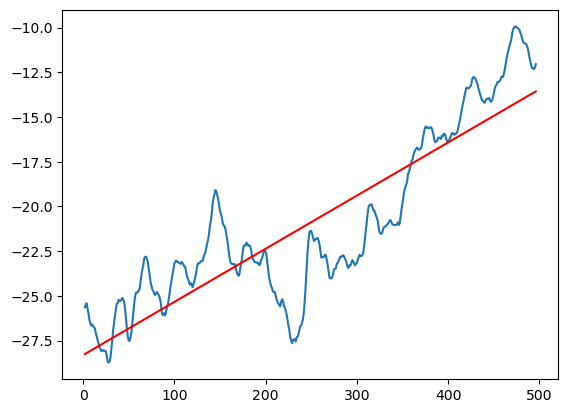

34 36


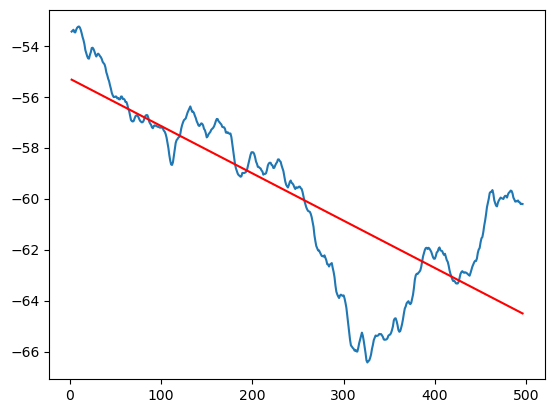

34 48


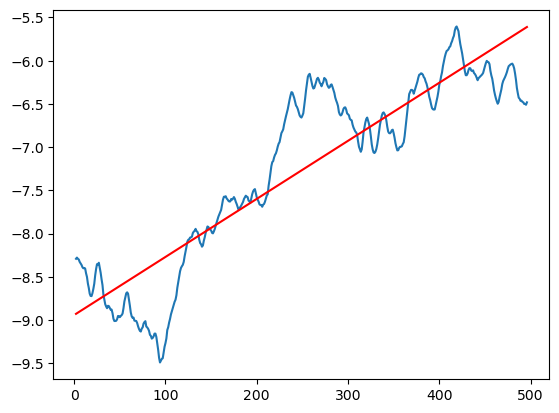

35 39


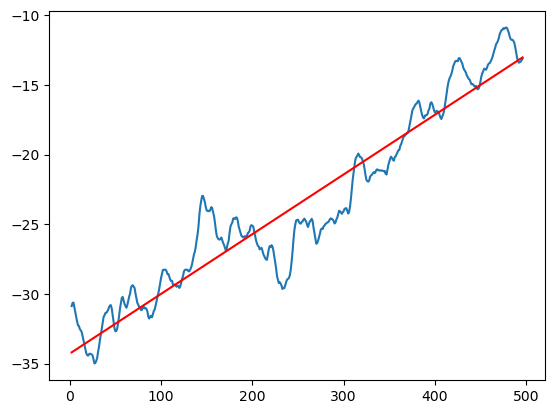

39 41


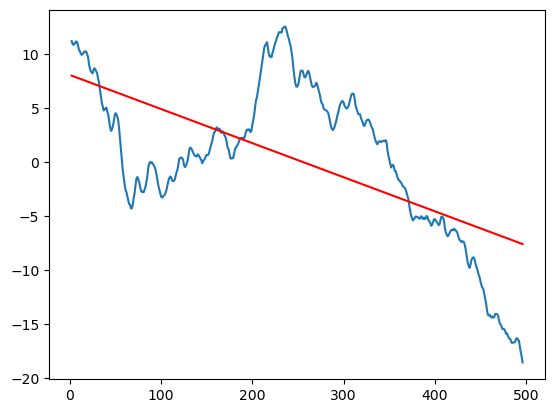

In [137]:
for ([stock_i, stock_j], outcome) in colint_stock_list_ct:
    stock_i_df = moving_avg[moving_avg['stock'] == stock_i]
    stock_j_df = moving_avg[moving_avg['stock'] == stock_j]

    print(stock_i, stock_j)

    plt.plot(stock_i_df['mid_date'], (stock_i_df['avg_price'].reset_index() - stock_j_df['avg_price'].reset_index()).drop('index', axis=1), label=stock_i)
    
    # LR line
    x = stock_i_df['mid_date']
    trend = trend_moving_avg[trend_moving_avg['Pair'] == (stock_i, stock_j)]
    y = float(trend['Slope']) * x + float(trend['intercept'])
    plt.plot(x, y, color='red')
    plt.show()